# Logistic Regression Project

In this project we will be working with an advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

'Daily Time Spent on Site': consumer time on site in minutes
'Age': cutomer age in years
'Area Income': Avg. Income of geographical area of consumer
'Daily Internet Usage': Avg. minutes a day consumer is on the internet
'Ad Topic Line': Headline of the advertisement
'City': City of consumer
'Male': Whether or not consumer was male
'Country': Country of consumer
'Timestamp': Time at which consumer clicked on Ad or closed window
'Clicked on Ad': 0 or 1 indicated clicking on Ad

### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Get Data

In [46]:
ad_data = pd.read_csv('advertising.csv')

In [30]:
ad_data.head(2)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0


In [5]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [6]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


### Exploring Data

##### Chick if there are missing data

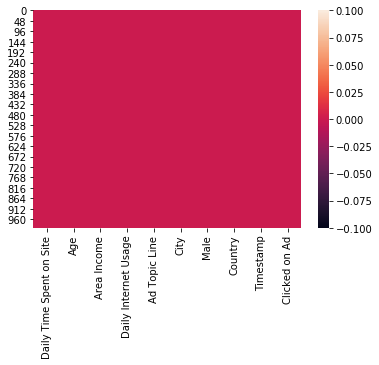

In [21]:
sns.heatmap(ad_data.isnull())

It looks like our data set doesn't have any null values. 

##### Age Distribution

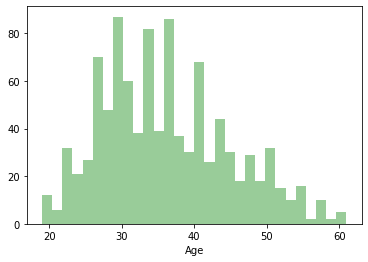

In [11]:
sns.distplot(ad_data['Age'], kde=False, color='green', bins=30)

It looks like our age data is normally distributed.

##### Area Income vs Age

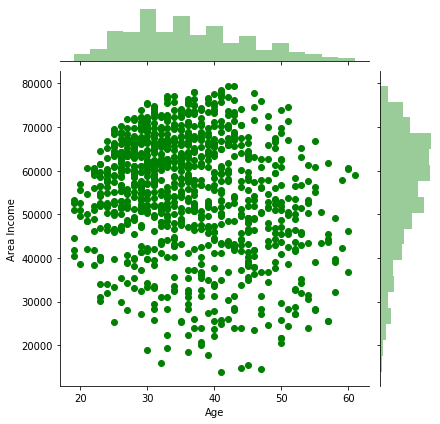

In [12]:
sns.jointplot(x = 'Age', y='Area Income', data=ad_data, color='green')

This plot shows that people tend to live in lower income areas if they are below the age of 20 (not making money yet), or if they are above age of retirement. 

##### Daily time spent vs Age

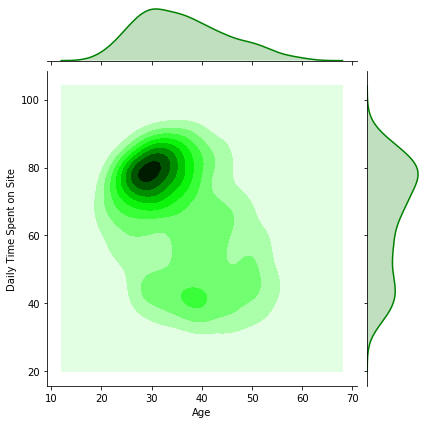

In [14]:
sns.jointplot(x = 'Age', y='Daily Time Spent on Site', data=ad_data, color='green', kind='kde')

here we can see larger consintration of yonger peole spending more time on the website. 

##### Daily time spent on site vs Daily internwet usage

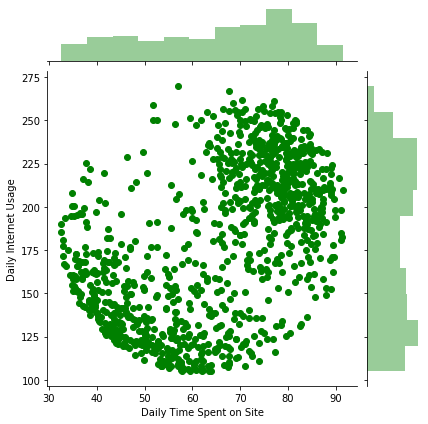

In [15]:
sns.jointplot(y = 'Daily Internet Usage', x='Daily Time Spent on Site', data=ad_data, color='green')

Here it looks that our data set is divided into 2 clusters, one with people who spend more time on both the website, and on internet in general; while the other is spending less time on both. 

##### Comparing all features, while diffrentiating between 'clicked on ad' and 'not clicked on ad'

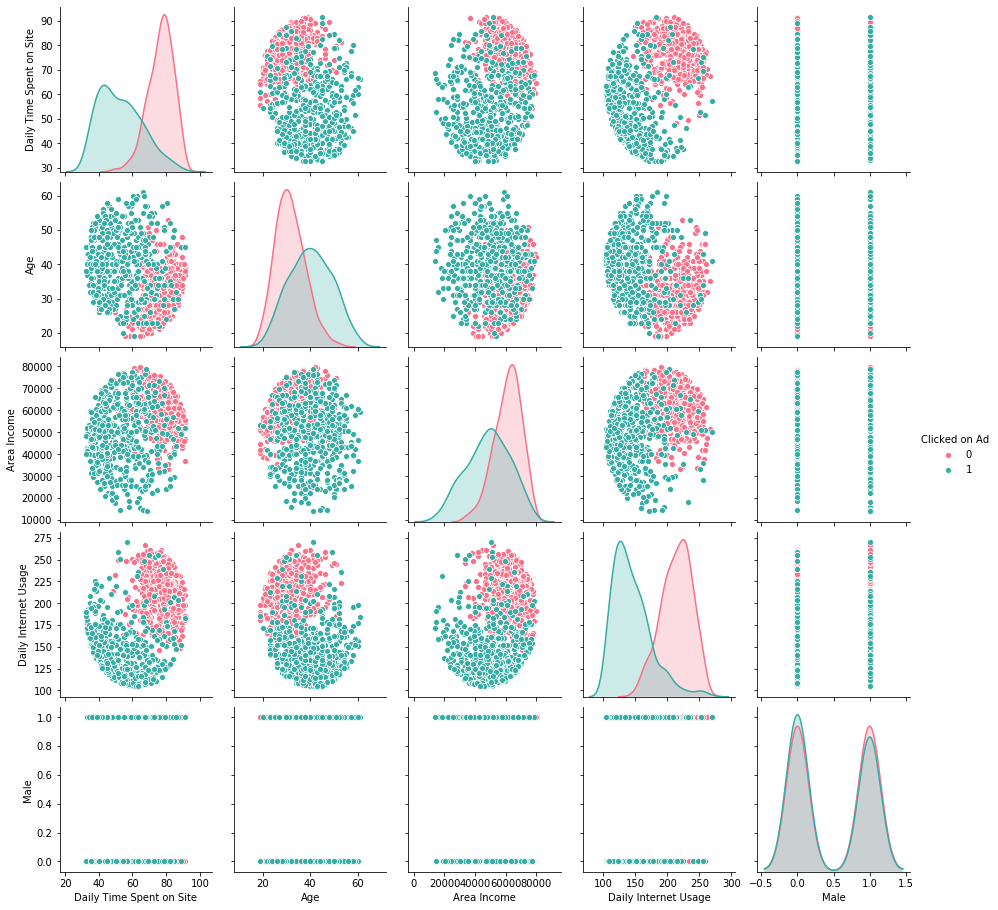

In [48]:
sns.pairplot(ad_data, hue='Clicked on Ad',palette="husl")

### Data set Spliting

In [22]:
from sklearn.model_selection import train_test_split

Before splitting the data set into tarining and testing sections, we need to decide which features will be considered while training the model. 

Due to the nature of our classification problem, we decided to drop the following features from consideration: 'Ad Topic Line', 'City', 'Country','Timestamp'.

In retun, we will be using the following features: 'Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male'. 


In [31]:
ad_data.drop([ 'Ad Topic Line', 'City', 'Country','Timestamp'], axis=1, inplace=True)

In [33]:
ad_data.head(5)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
0,68.95,35,61833.90,256.09,0,0
1,80.23,31,68441.85,193.77,1,0
2,69.47,26,59785.94,236.50,0,0
3,74.15,29,54806.18,245.89,1,0
4,68.37,35,73889.99,225.58,0,0


Now we are ready to plit our data set

In [34]:
X_train, X_test, y_train, y_test = train_test_split(ad_data.drop('Clicked on Ad',axis=1), 
                                                    ad_data['Clicked on Ad'], test_size=0.40, 
                                                    random_state=101)

### Training

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
admodel = LogisticRegression()
admodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Predictions 

In [39]:
predictions = admodel.predict(X_test)

### Evaluation

In [41]:
from sklearn.metrics import classification_report

In [42]:
#We can print our classification report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       206
           1       0.92      0.88      0.90       194

    accuracy                           0.91       400
   macro avg       0.91      0.91      0.91       400
weighted avg       0.91      0.91      0.91       400



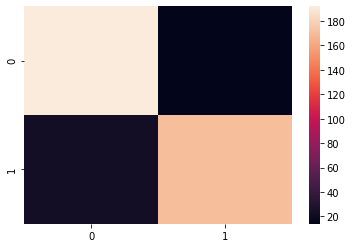

In [43]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, predictions))

In [44]:
confusion_matrix(y_test, predictions)

array([[192,  14],
       [ 23, 171]], dtype=int64)